# Machine Learning - Chapter 2
> End-to-End Machine Learning Project

## Definitions
### **Pipelines:** A sequence of data processing components is called a data pipeline.

## Project steps:
### 1) Frame the problem: find the objective => what models and algorithms to use
### 2) Select a performance measure: observe the error => RMSE, MAE
### 3) Check previously made assumptions: you never know
### 4) Get the dataset
### 5) Visualize the data and prepare it
### 6) Work your magic: train, test, fine-tune, and launch your model


## Sample project:
Build a model of housing prices and process it with ML.

### **Steps 1-3**
Pretty self-explanatory if I say so myself. 

### **Step 4**

In [5]:
import os
import tarfile

from urllib import request

URL = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz"
PATH = os.path.join("datasets", "housing")

def fetch_dataset(data_url = URL, data_path= PATH):
    if not (os.path.isdir(data_path)):
        os.mkdir(data_path)
    data_file = os.path.join(data_path, "housing.tgz")
    request.urlretrieve(data_url, data_file)
    housing_file = tarfile.open(data_file)
    housing_file.extractall(path=data_path)
    housing_file.close()

fetch_dataset()

### **Step 5**


In [6]:
import pandas as pd

def load_dataset(data_path=PATH):
    csv_path = os.path.join(data_path, "housing.csv")
    return pd.read_csv(csv_path)

housing_data = load_dataset()
# top 5 entries
housing_data.head()
# info of the whole dataset
housing_data.info()
# info of the ocean_proximity object
housing_data["ocean_proximity"].value_counts()
# summary of numerical attributes
housing_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


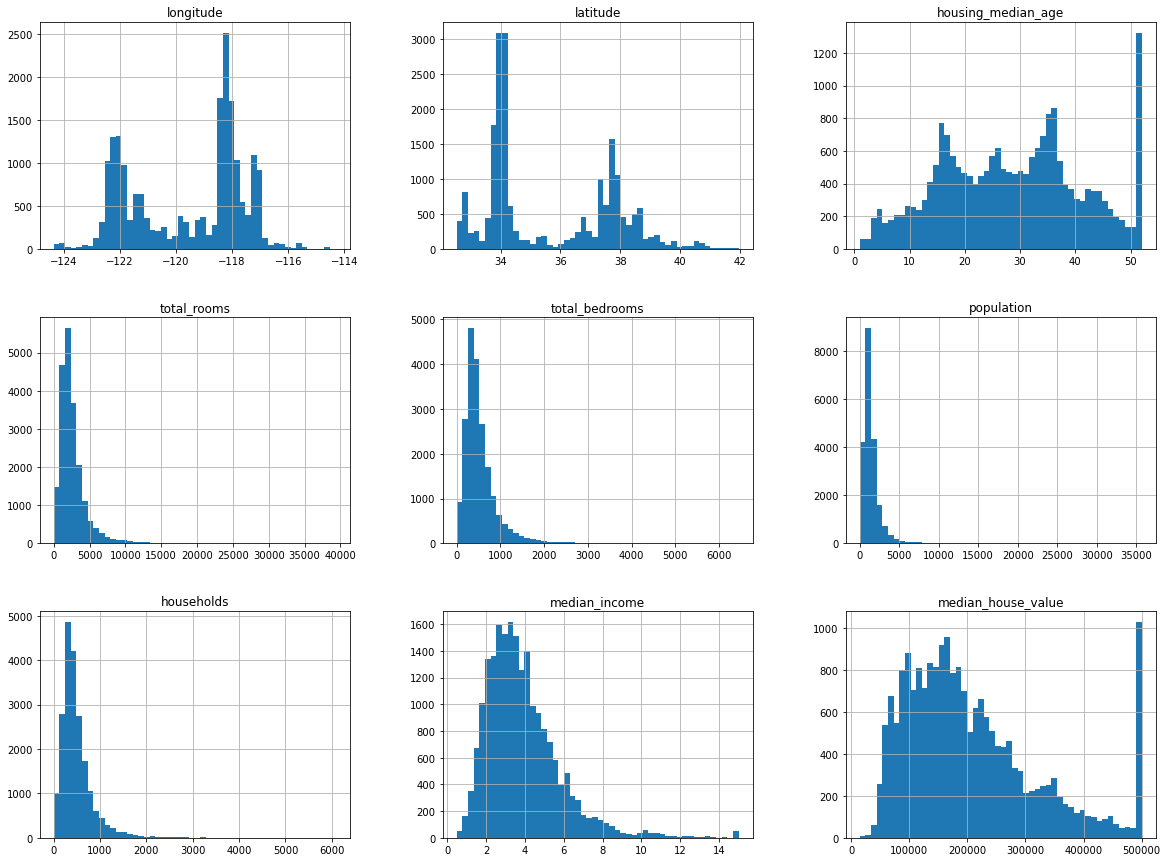

In [11]:
import matplotlib.pyplot as plt

# draw histogram
housing_data.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
import numpy as np

from zlib import crc32
from sklearn.model_selection import train_test_split

def split_data(data, ratio):
    indices = np.random.permutation(len(data))
    set_size = int(len(data)*ratio)
    test_idx = indices[:set_size]
    train_idx = indices[set_size:]

    return data.iloc[train_idx], data.iloc[test_idx]

# train_set, test_set = split_data(housing_data, 0.2)

# However, in this approach the training and test sets would be different everytime.
# Therefore, we use hashes to do the splitting.

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_data_hash(data, ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

# set an ID (index) for each instance in the housing_data
# housing_data_with_id = housing_data.reset_index()
# get the sets
# train_set, test_set = split_data_hash(housing_data_with_id, 0.2, "index")

# additionally, the sklearn library can be used as well
train_set, test_set = train_test_split(housing_data, test_size= 0.2, random_state= 42)

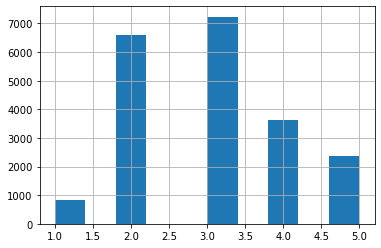

In [9]:
housing_data["income_cat"] = pd.cut(housing_data["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])
housing_data["income_cat"].hist()

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in split.split(housing_data, housing_data["income_cat"]):
    strat_train_set = housing_data.loc[train_idx]
    strat_test_set = housing_data.loc[test_idx]

print(strat_test_set["income_cat"].value_counts()/len(strat_test_set))

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64
